### PARTE I

1) Importe o arquivo alunos.csv e armazene seu conteúdo em um DataFrame Pandas.

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
dados = pd.read_csv(url)

2) Visualize as primeiras 7 linhas do DataFrame e as 5 últimas.

In [3]:
dados.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [4]:
dados.tail()

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


3) Confira a quantidade de linhas e colunas desse DataFrame.

In [5]:
dados.shape

(18, 4)

4) Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna.

In [6]:
dados.columns

Index(['Nome', 'Idade', 'Notas', 'Aprovado'], dtype='object')

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 582.0+ bytes


In [8]:
dados.describe()

,Idade,Notas
count,18.000000,12.000000
mean,25.500000,6.800000
std,6.070662,2.204953
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


### PARTE II

1) Calcular a média de quartos por apartamento;

In [9]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [10]:
# dados.query('Tipo == "Apartamento"')['Quartos'].mean()
dados['Quartos'].mean()

1.7713895631067962

2) Conferir quantos bairros únicos existem na nossa base de dados;

In [11]:
len(dados['Bairro'].unique())

162

3) Analisar quais bairros possuem a média de valor de aluguel mais elevadas;

In [12]:
dados.groupby('Bairro')['Valor'].mean(numeric_only=True).sort_values(ascending=False).head(5)

Bairro
Jacarepaguá      314143.489637
Irajá            154610.470588
Caju             120264.782609
Vasco da Gama    120000.000000
Cidade Nova       88166.692308
Name: Valor, dtype: float64

4) Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.

In [13]:
bairros_top_5 = ['Jacarepaguá','Irajá','Caju','Vasco da Gama','Cidade Nova']
dados_5_primeiros = dados.query('@bairros_top_5 in Bairro').groupby('Bairro')['Valor'].mean().sort_values(ascending=False)
dados_5_primeiros

Bairro
Jacarepaguá      314143.489637
Irajá            154610.470588
Caju             120264.782609
Vasco da Gama    120000.000000
Cidade Nova       88166.692308
Name: Valor, dtype: float64

<Axes: xlabel='Bairro'>

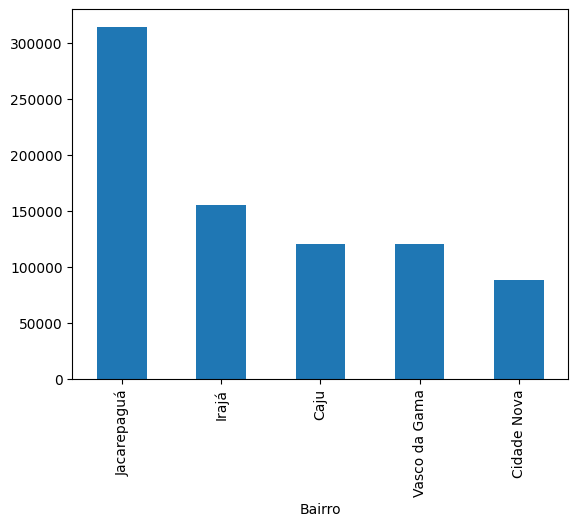

In [14]:
dados_5_primeiros.plot(kind = 'bar')

In [15]:
top5 = dados.groupby('Bairro')['Valor'].mean(numeric_only=True).sort_values(ascending=False).head(5)

<Axes: xlabel='Bairro'>

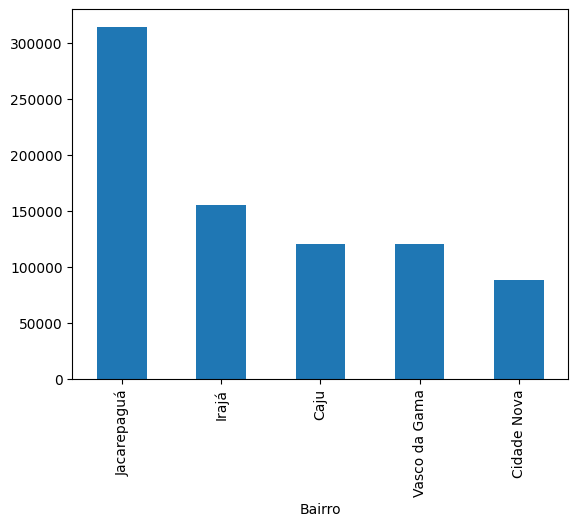

In [16]:
top5.plot(kind = 'bar')

# PARTE III

1) Verifique se a base de dados possui dados nulos e, caso tenha, realize o tratamento desses dados nulos da forma que achar mais coerente com a situação.}

In [17]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
dados = pd.read_csv(url)
dados.head()

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True


In [18]:
dados.isnull().sum()

Nome        0
Idade       0
Notas       6
Aprovado    0
dtype: int64

In [19]:
dados.fillna(5, inplace = True)

In [20]:
dados.isnull().sum()

Nome        0
Idade       0
Notas       0
Aprovado    0
dtype: int64

In [21]:
dados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,5.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,5.0,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,5.0,False


2) Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados.

In [22]:
registros_a_remover = dados.query('Nome == "Alice" | Nome == "Carlos"').index
df = dados.drop(registros_a_remover, axis = 0)
df

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,5.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,5.0,False
6,Dara,21,7.0,True
9,Vitor,28,5.0,False
10,Daniel,21,5.0,False
11,Igor,24,4.5,False


3) Aplique um filtro que selecione apenas os alunos que foram aprovados.

In [23]:
selecao = df['Aprovado' ] == True
df[selecao]

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


4) Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv".

In [24]:
df[selecao].to_csv('alunos_aprovados.csv', index=False)

In [25]:
pd.read_csv('alunos_aprovados.csv')

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Beto,21,10.0,True
2,Dara,21,7.0,True
3,Sthefanie,26,9.5,True
4,Mirla,25,9.0,True
5,Mylena,29,7.0,True
6,Nadia,34,8.0,True


# PARTE IV

1) Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles.

In [26]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
dados = pd.read_csv(url)
dados.head()

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True


In [27]:
# dados['Pontos_extras']  = 0.4 * dados['Notas']
# dados
dados['Pontos_extras'] = dados['Notas'].apply(lambda x: x * 0.4)
dados

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.00
1,Ana,18,NaN,False,NaN
2,Cátia,27,2.5,False,1.00
3,Denis,18,5.0,False,2.00
4,Beto,21,10.0,True,4.00
5,Bruna,23,NaN,False,NaN
6,Dara,21,7.0,True,2.80
7,Carlos,19,6.0,True,2.40
8,Alice,35,5.6,False,2.24
9,Vitor,28,NaN,False,NaN


2) Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras.

In [28]:
dados['Notas_finais'] = dados['Notas'] + dados['Pontos_extras']
dados

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.00,10.50
1,Ana,18,NaN,False,NaN,NaN
2,Cátia,27,2.5,False,1.00,3.50
3,Denis,18,5.0,False,2.00,7.00
4,Beto,21,10.0,True,4.00,14.00
5,Bruna,23,NaN,False,NaN,NaN
6,Dara,21,7.0,True,2.80,9.80
7,Carlos,19,6.0,True,2.40,8.40
8,Alice,35,5.6,False,2.24,7.84
9,Vitor,28,NaN,False,NaN,NaN


3) Como houve uma pontuação extra, alguns alunos que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

In [29]:
dados['Aprovado_final'] = dados['Notas_finais'].apply(lambda x: True if x > 6 else False)
dados

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.00,10.50,True
1,Ana,18,NaN,False,NaN,NaN,False
2,Cátia,27,2.5,False,1.00,3.50,False
3,Denis,18,5.0,False,2.00,7.00,True
4,Beto,21,10.0,True,4.00,14.00,True
5,Bruna,23,NaN,False,NaN,NaN,False
6,Dara,21,7.0,True,2.80,9.80,True
7,Carlos,19,6.0,True,2.40,8.40,True
8,Alice,35,5.6,False,2.24,7.84,True
9,Vitor,28,NaN,False,NaN,NaN,False


4) Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras.

In [30]:
for i in range(len(dados['Aprovado_final'])):
    if dados['Aprovado_final'][i] != dados['Aprovado'][i]:
        print(dados['Nome'][i])

Denis
Alice
Igor


In [31]:
selecao = dados.query('Aprovado != Aprovado_final')
selecao

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.00,7.00,True
8,Alice,35,5.6,False,2.24,7.84,True
11,Igor,24,4.5,False,1.80,6.30,True


In [32]:
selecao = dados['Aprovado'] != dados['Aprovado_final']
dados[selecao]

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.00,7.00,True
8,Alice,35,5.6,False,2.24,7.84,True
11,Igor,24,4.5,False,1.80,6.30,True
